In [1]:
%matplotlib inline

import numpy as np, matplotlib.pyplot as plt, matplotlib.ticker as ticker, IPython.display as ipd
import librosa, librosa.display

# How is laudness measured? (what are decibels)

When dealing with sounds, there are logarithms everywhere! I shared a post on [what logarithms are](https://towardsdatascience.com/why-take-the-log-of-a-continuous-target-variable-1ca0069ee935) a while ago, in it I try to explain what a logarithm does and how it applies to machine learning.

When it comes to sound, the short of the story is that our perception is [roughly logarithmic](https://en.wikipedia.org/wiki/Mel_scale). The pitches we perceive to be equally spaced are not equally apart in terms of frequencies.

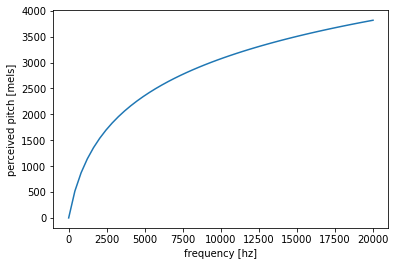

In [2]:
frequency = np.linspace(0, 20000)
mel_scale = lambda f: 1127 * np.log(1 + f/700)
perceived_pitch = mel_scale(frequency)

plt.ylabel('perceived pitch [mels]')
plt.xlabel('frequency [hz]')
plt.plot(frequency, perceived_pitch)

This is true of pitch, but it also holds for loudness. If we compare two sounds, the perceived difference in loudness (2x loud for example!) will not translate to one sound having 2x the power of the other. Rather, it will have `power_of_first_sound * 10` power!

If there was another sound that seemed louder from the second sound by the same relative amount the second sound was louder from the first sound (2x as loud), it would have `10 * power_of_second_sound` but a `100 * power_of_first_sound`!

Unfortunately, [whoever came up with the scale we use to measure laudness](https://en.wikipedia.org/wiki/Decibel#History), decibels, threw us a curve ball.

$${\text{Np}}=10\log _{10}\!\left({\frac {P}{P_{0}}}\right)\,{\text{dB}}$$

The 10 up front complicates matters even further. A sound that seems twice as loud as another sound will have 10x the power of that sound but will be 10 decibels louder! A sound that seems 4x as loud as the first one will have 100x the power of it ($10^2$), but in decibels it will be 20 decibels apart. Oh my!

Thankfully, for working with sound the scale is not that important. What is important is understanding how humans perceive sound and that perception is logarithmic.

Our hearing evolved over millions of years - the fact that the perception of sound is logarithmic might indicate that this way of perceiving the environment is superior to linear. It might be useful to endow our model with this capability. The easier we can make the task at hand for the model, the greater the chance it will perform well!

As as side note, sound is not the only thing we perceive in a logarithmic fashion, [we perceive the intensity of light in a similar manner!](https://en.wikipedia.org/wiki/Decibel#Perception)!